# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
sb.set_style("whitegrid")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348000 entries, 0 to 2347999
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21095
Address                             12
Zip Code                         14608
Council District                 47585
APD Sector                        9293
APD District                      9780
PRA                              11100
Census Tract                    428754
Clearance Status                612198
Clearance Date                  343011
UCR Category                   1545113
Category Description           1545113
X-coordinate                     10487
Y-coordinate                     10487
Latitude                         39811
Longitude                

Incident Number Highest Offense Description  Highest Offense Code  \
0      20191571574               FRAUD - OTHER                  1199   
1      20191550153              DEADLY CONDUCT                   408   
2      20195022816      THEFT OF LICENSE PLATE                   614   
3      20205007833               RUNAWAY CHILD                  4100   
4      20191671388       BURGLARY OF RESIDENCE                   500   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  06/03/2019 04:00:00 PM    06/03/2019         1600.0   
1               N  06/04/2019 03:12:00 AM    06/04/2019          312.0   
2               N  06/03/2019 03:00:00 PM    06/03/2019         1500.0   
3               N  02/22/2020 06:00:00 PM    02/22/2020         1800.0   
4               N  06/14/2019 12:00:00 PM    06/14/2019         1200.0   

         Report Date Time Report Date  Report Time  \
0  06/06/2019 05:34:00 PM  06/06/2019       1734.0   
1  06/04/2019 03:16:00 AM  06/04/2019        316.0   
2  06/04/2019 03:22:00 PM  06/04/2019       1522.0   
3  02/24/2020 06:03:00 PM  02/24/2020       1803.0   
4  06/16/2019 10:00:00 PM  06/16/2019       2200.0   

                 Location Type                       Address  Zip Code  \
0  DEPARTMENT / DISCOUNT STORE            10817 BALLARD PATH   78717.0   
1             RESIDENCE / HOME          8312 N IH 35 SVRD SB   78753.0   
2             RESIDENCE / HOME                6312 LIBYAN DR   78745.0   
3             RESIDENCE / HOME            13012 DEARBONNE DR   78617.0   
4             RESIDENCE / HOME  3809 SPICEWOOD SPRINGS RD EB   78731.0   

   Council District APD Sector APD District    PRA  Census Tract  \
0               6.0         AD            5  573.0        203.11   
1               4.0         ED            1  250.0         18.06   
2               2.0         FR            4  509.0         24.09   
3               2.0         HE            7  612.0           NaN   
4              10.0         BA            8  256.0         17.51   

  Clearance Status Clearance Date UCR Category Category Description  \
0              NaN            NaN          NaN                  NaN   
1                N     06/06/2019          13A   Aggravated Assault   
2                N     06/04/2019          23G                Theft   
3                N     03/03/2020          NaN                  NaN   
4                N     09/18/2019          220             Burglary   

   X-coordinate  Y-coordinate   Latitude  Longitude  \
0     3097785.0     3097785.0  30.483646 -97.789495   
1     3128227.0     3128227.0  30.346646 -97.696573   
2     3098393.0     3098393.0  30.205267 -97.794900   
3     3155456.0     3155456.0  30.176140 -97.615031   
4     3111039.0     3111039.0  30.364987 -97.750587   

                      Location  
0   (30.48364631, -97.7894953)  
1  (30.34664576, -97.69657342)  
2  (30.20526729, -97.79490043)  
3   (30.17613952, -97.6150307)  
4  (30.36498691, -97.75058749)

Incident Number  Highest Offense Description  Highest Offense Code  \
2347995      20143631822           FAMILY DISTURBANCE                  3400   
2347996      20191270738         THEFT BY SHOPLIFTING                   607   
2347997       2008501470  CRIMINAL TRESPASS/TRANSIENT                  2721   
2347998    2003921400113                          DWI                  2100   
2347999      20081340129    URINATING IN PUBLIC PLACE                  3212   

        Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
2347995               N  12/29/2014 11:41:00 PM    12/29/2014         2341.0   
2347996               N  05/07/2019 10:50:00 AM    05/07/2019         1050.0   
2347997               N  02/19/2008 05:00:00 PM    02/19/2008         1700.0   
2347998               N  05/20/2003 01:32:00 AM    05/20/2003          132.0   
2347999               N  05/13/2008 01:10:00 AM    05/13/2008          110.0   

               Report Date Time Report Date  Report Time  \
2347995  12/29/2014 11:41:00 PM  12/29/2014       2341.0   
2347996  05/07/2019 11:31:00 AM  05/07/2019       1131.0   
2347997  02/19/2008 05:00:00 PM  02/19/2008       1700.0   
2347998  05/20/2003 01:32:00 AM  05/20/2003        132.0   
2347999  05/13/2008 01:10:00 AM  05/13/2008        110.0   

                        Location Type               Address  Zip Code  \
2347995              RESIDENCE / HOME    109 MASTERSON PASS   78753.0   
2347996   DEPARTMENT / DISCOUNT STORE    11423 N LAMAR BLVD   78753.0   
2347997         PARKING LOTS / GARAGE       6800 BERKMAN DR   78723.0   
2347998  STREETS / HWY / ROAD / ALLEY  4500 N MOPAC EXPY NB   78731.0   
2347999  STREETS / HWY / ROAD / ALLEY    400 BLOCK E 6TH ST   78701.0   

         Council District APD Sector APD District    PRA  Census Tract  \
2347995               4.0         ED            1  240.0         18.23   
2347996               7.0         ED            4  221.0         18.24   
2347997               1.0         ID            5  293.0         21.00   
2347998              10.0         BA            6  325.0          1.00   
2347999               9.0         GE            2  382.0         11.00   

        Clearance Status Clearance Date UCR Category Category Description  \
2347995                N     01/02/2015          NaN                  NaN   
2347996              NaN            NaN          23C                Theft   
2347997              NaN            NaN          NaN                  NaN   
2347998                C     05/22/2003          NaN                  NaN   
2347999                C     05/17/2008          NaN                  NaN   

         X-coordinate  Y-coordinate   Latitude  Longitude  \
2347995     3130776.0     3130776.0  30.369795 -97.687855   
2347996     3131578.0     3131578.0  30.383630 -97.684932   
2347997     3130390.0     3130390.0  30.320281 -97.690437   
2347998     3109748.0     3109748.0  30.320565 -97.755869   
2347999     3115491.0     3115491.0  30.267351 -97.739093   

                            Location  
2347995  (30.36979494, -97.68785533)  
2347996  (30.38362955, -97.68493154)  
2347997   (30.32028083, -97.6904366)  
2347998   (30.32056515, -97.7558693)  
2347999  (30.26735144, -97.73909331)

## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
def clean_data(df):
    drop_col = [
        "Highest Offense Code",
        "Incident Number",
        "Occurred Time",
        "Occurred Date",
        "Report Date",
        "Report Time",
        "UCR Category",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "pra",
        "census_tract",
        "location_type",
        "apd_district",
        "apd_sector",
        "clearance_status",
        "category_description",
    ]
    df[fillna].fillna("Unknown", inplace=True)

    date_col = ["occurred_date_time", "report_date_time", "clearance_date"]

    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "pra",
        "census_tract",
        "category_description",
    ]

    df.family_violence = df.family_violence.replace({"Y": "True", "N": "False"})
    df.clearance_status = df.clearance_status.replace(
        {"C": "True", "O": "True", "N": "False"}
    )

    df[cat_col] = df[cat_col].astype("category")

    df[date_col] = df[date_col].astype("datetime64")

    df["year"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.day
    df["hour"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.hour

    df.set_index(["occurred_date_time"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [7]:
df.duplicated().sum()

703

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
# Re-examining the dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347297 entries, 2003-01-01 00:00:00 to NaT
Data columns (total 21 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   pra                          category      
 10  census_tract                 category      
 11  clearance_status             object        
 12  clearance_date               datetime64[ns]
 13  category_description         category      
 14  latitude                     float64       
 15  longitude                    flo

None

highest_offense_description family_violence  \
occurred_date_time                                                   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01          AGG SEXUAL ASSAULT CHILD/OBJEC           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01          SEXUAL ASSAULT OF CHILD/OBJECT           False   
2003-01-01                     FORGERY AND PASSING           False   

                      report_date_time                 location_type  \
occurred_date_time                                                     
2003-01-01         2008-05-10 18:36:00              RESIDENCE / HOME   
2003-01-01         2008-09-17 11:43:00              RESIDENCE / HOME   
2003-01-01         2005-02-14 17:30:00  COMMERCIAL / OFFICE BUILDING   
2003-01-01         2005-03-31 16:40:00              RESIDENCE / HOME   
2003-01-01         2003-09-13 09:35:00  COMMERCIAL / OFFICE BUILDING   

                                         address zip_code council_district  \
occurred_date_time                                                           
2003-01-01               7312 WHISPERING OAKS DR  78745.0              5.0   
2003-01-01             2500 BLOCK S CONGRESS AVE  78704.0              3.0   
2003-01-01                          715 E 8TH ST  78701.0              9.0   
2003-01-01          6600 BLOCK ED BLUESTEIN BLVD  78723.0              NaN   
2003-01-01                        8501 BURNET RD  78757.0              7.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
2003-01-01                 FR            1  525.0          NaN   
2003-01-01                 DA            2  479.0        23.00   
2003-01-01                 GE            2  382.0        11.00   
2003-01-01                 ED            3  299.0      2201.00   
2003-01-01                 ID            7  234.0        18.18   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
2003-01-01                      NaN     2008-05-13                  NaN   
2003-01-01                    False     2008-10-27                 Rape   
2003-01-01                      NaN            NaT                  NaN   
2003-01-01                     True     2005-07-12                 Rape   
2003-01-01                      NaN     2003-09-15                  NaN   

                     latitude  longitude    year  month  week  day  hour  
occurred_date_time                                                        
2003-01-01          30.202175 -97.817542  2003.0    1.0   1.0  1.0   0.0  
2003-01-01                NaN        NaN  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.267553 -97.734674  2003.0    1.0   1.0  1.0   0.0  
2003-01-01                NaN        NaN  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.366117 -97.727721  2003.0    1.0   1.0  1.0   0.0

highest_offense_description family_violence  \
occurred_date_time                                                 
NaT                            SUSPICIOUS PERSON           False   
NaT                            SUSPICIOUS PERSON           False   
NaT                 POSS CONTROLLED SUB/NARCOTIC           False   
NaT                                RUNAWAY CHILD           False   
NaT                          BURGLARY OF VEHICLE           False   

                      report_date_time     location_type  \
occurred_date_time                                         
NaT                2005-05-24 20:14:00               NaN   
NaT                2008-01-11 10:33:00               NaN   
NaT                2007-04-04 18:39:00               NaN   
NaT                2004-02-24 22:55:00               NaN   
NaT                2003-05-06 10:47:00  RESIDENCE / HOME   

                                        address zip_code council_district  \
occurred_date_time                                                          
NaT                            8200 GEORGIAN DR  78753.0              4.0   
NaT                 SAN JACINTO BLVD / E 4TH ST  78701.0              9.0   
NaT                                1511 FARO DR  78741.0              3.0   
NaT                           400 W LIVE OAK ST  78704.0              9.0   
NaT                         1908 SAN ANTONIO ST  78705.0              9.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
NaT                        ED            1  250.0        18.00   
NaT                        GE            2  381.0        11.00   
NaT                        HE            3  442.0        23.17   
NaT                        DA            1  476.0        13.00   
NaT                        BA            1  359.0         6.00   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
NaT                           False     2005-06-28                  NaN   
NaT                             NaN     2008-01-16                  NaN   
NaT                           False     2007-07-25                  NaN   
NaT                           False     2004-02-25                  NaN   
NaT                           False            NaT                Theft   

                     latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                      
NaT                 30.347657 -97.703221   NaN    NaN   NaN  NaN   NaN  
NaT                 30.265527 -97.741069   NaN    NaN   NaN  NaN   NaN  
NaT                 30.235041 -97.713595   NaN    NaN   NaN  NaN   NaN  
NaT                 30.243872 -97.755879   NaN    NaN   NaN  NaN   NaN  
NaT                 30.282945 -97.743406   NaN    NaN   NaN  NaN   NaN

## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

zip_code
78741.0    210217
78753.0    182509
78701.0    170989
78758.0    162868
78704.0    157507
78745.0    153596
78702.0    138660
78744.0    128656
78723.0    120591
78752.0     86129
78748.0     69659
78759.0     67891
78751.0     65336
78757.0     59001
78705.0     58293
78721.0     48589
78749.0     41190
78724.0     38347
78727.0     36723
78703.0     35897
78731.0     29418
78746.0     28602
78729.0     25971
78750.0     24300
78754.0     23614

zip_code
78741.0  0.090118
78753.0  0.078240
78701.0  0.073301
78758.0  0.069820
78704.0  0.067522
78745.0  0.065845
78702.0  0.059442
78744.0  0.055153
78723.0  0.051696
78752.0  0.036923
78748.0  0.029862
78759.0  0.029104
78751.0  0.028009
78757.0  0.025293
78705.0  0.024990
78721.0  0.020830
78749.0  0.017658
78724.0  0.016439
78727.0  0.015743
78703.0  0.015389
78731.0  0.012611
78746.0  0.012261
78729.0  0.011133
78750.0  0.010417
78754.0  0.010123

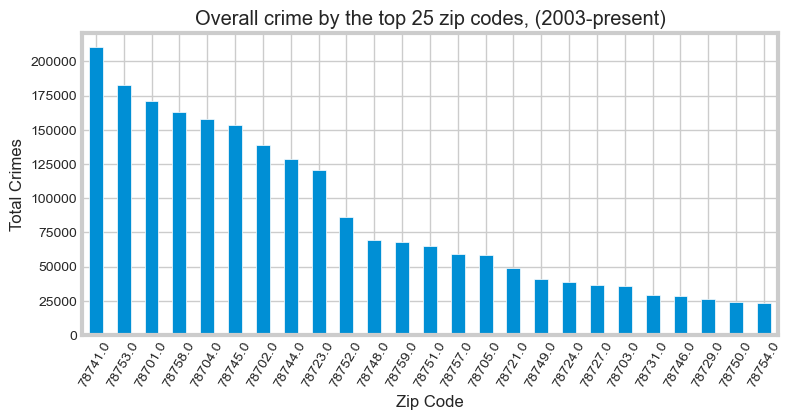

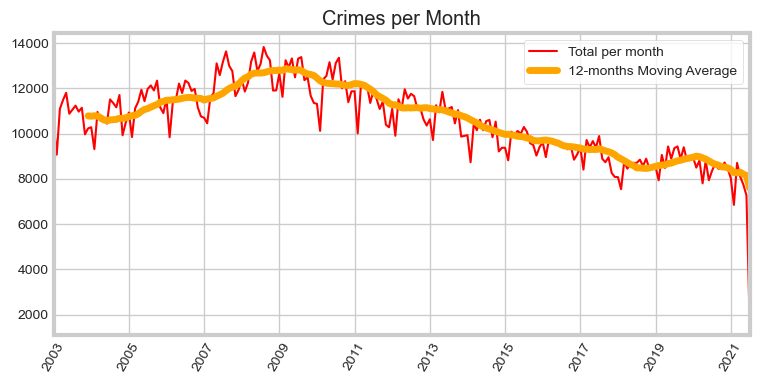

In [10]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
plt.figure(figsize=(8, 4), dpi=100)
df.zip_code.value_counts().head(25).plot.bar(
    title="Overall crime by the top 25 zip codes, (2003-present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 4), dpi=100)
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange",
    linewidth=5,
    label="12-months Moving Average",
    title="Crimes per Month",
    xlabel="",
    rot=60,
)
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

highest_offense_description
BURGLARY OF VEHICLE                                  233080
THEFT                                                214371
FAMILY DISTURBANCE                                   184097
CRIMINAL MISCHIEF                                    129663
ASSAULT W/INJURY-FAM/DATE VIOL                        79463
BURGLARY OF RESIDENCE                                 77876
DWI                                                   70340
PUBLIC INTOXICATION                                   69106
HARASSMENT                                            65220
DISTURBANCE - OTHER                                   62730

BURGLARY OF VEHICLE  HARASSMENT  \
occurred_date_time                                    
2003-01-31                         1225         293   
2003-02-28                         1110         309   
2003-03-31                         1222         363   
2003-04-30                         1396         353   
2003-05-31                         1487         345   
...                                 ...         ...   
2021-03-31                          431         195   
2021-04-30                          370         171   
2021-05-31                          348         146   
2021-06-30                          348         151   
2021-07-31                           88          14   

                    ASSAULT W/INJURY-FAM/DATE VIOL  CRIMINAL MISCHIEF  \
occurred_date_time                                                      
2003-01-31                                     349                722   
2003-02-28                                     342                594   
2003-03-31                                     421                700   
2003-04-30                                     432                709   
2003-05-31                                     424                750   
...                                            ...                ...   
2021-03-31                                     259                431   
2021-04-30                                     268                419   
2021-05-31                                     313                397   
2021-06-30                                     267                369   
2021-07-31                                      78                 80   

                    BURGLARY OF RESIDENCE  PUBLIC INTOXICATION  DWI  \
occurred_date_time                                                    
2003-01-31                            328                  341  408   
2003-02-28                            248                  354  328   
2003-03-31                            393                  450  406   
2003-04-30                            398                  385  375   
2003-05-31                            436                  451  418   
...                                   ...                  ...  ...   
2021-03-31                            154                   75  179   
2021-04-30                            128                   67  126   
2021-05-31                            155                   61  133   
2021-06-30                            140                   70  131   
2021-07-31                             42                   17   37   

                    FAMILY DISTURBANCE  TOTAL  
occurred_date_time                             
2003-01-31                         505   4171  
2003-02-28                         500   3785  
2003-03-31                         546   4501  
2003-04-30                         678   4726  
2003-05-31                         650   4961  
...                                ...    ...  
2021-03-31                         877   2601  
2021-04-30                         799   2348  
2021-05-31                         885   2438  
2021-06-30                         799   2275  
2021-07-31                         230    586  

[223 rows x 9 columns]

<Figure size 432x288 with 0 Axes>

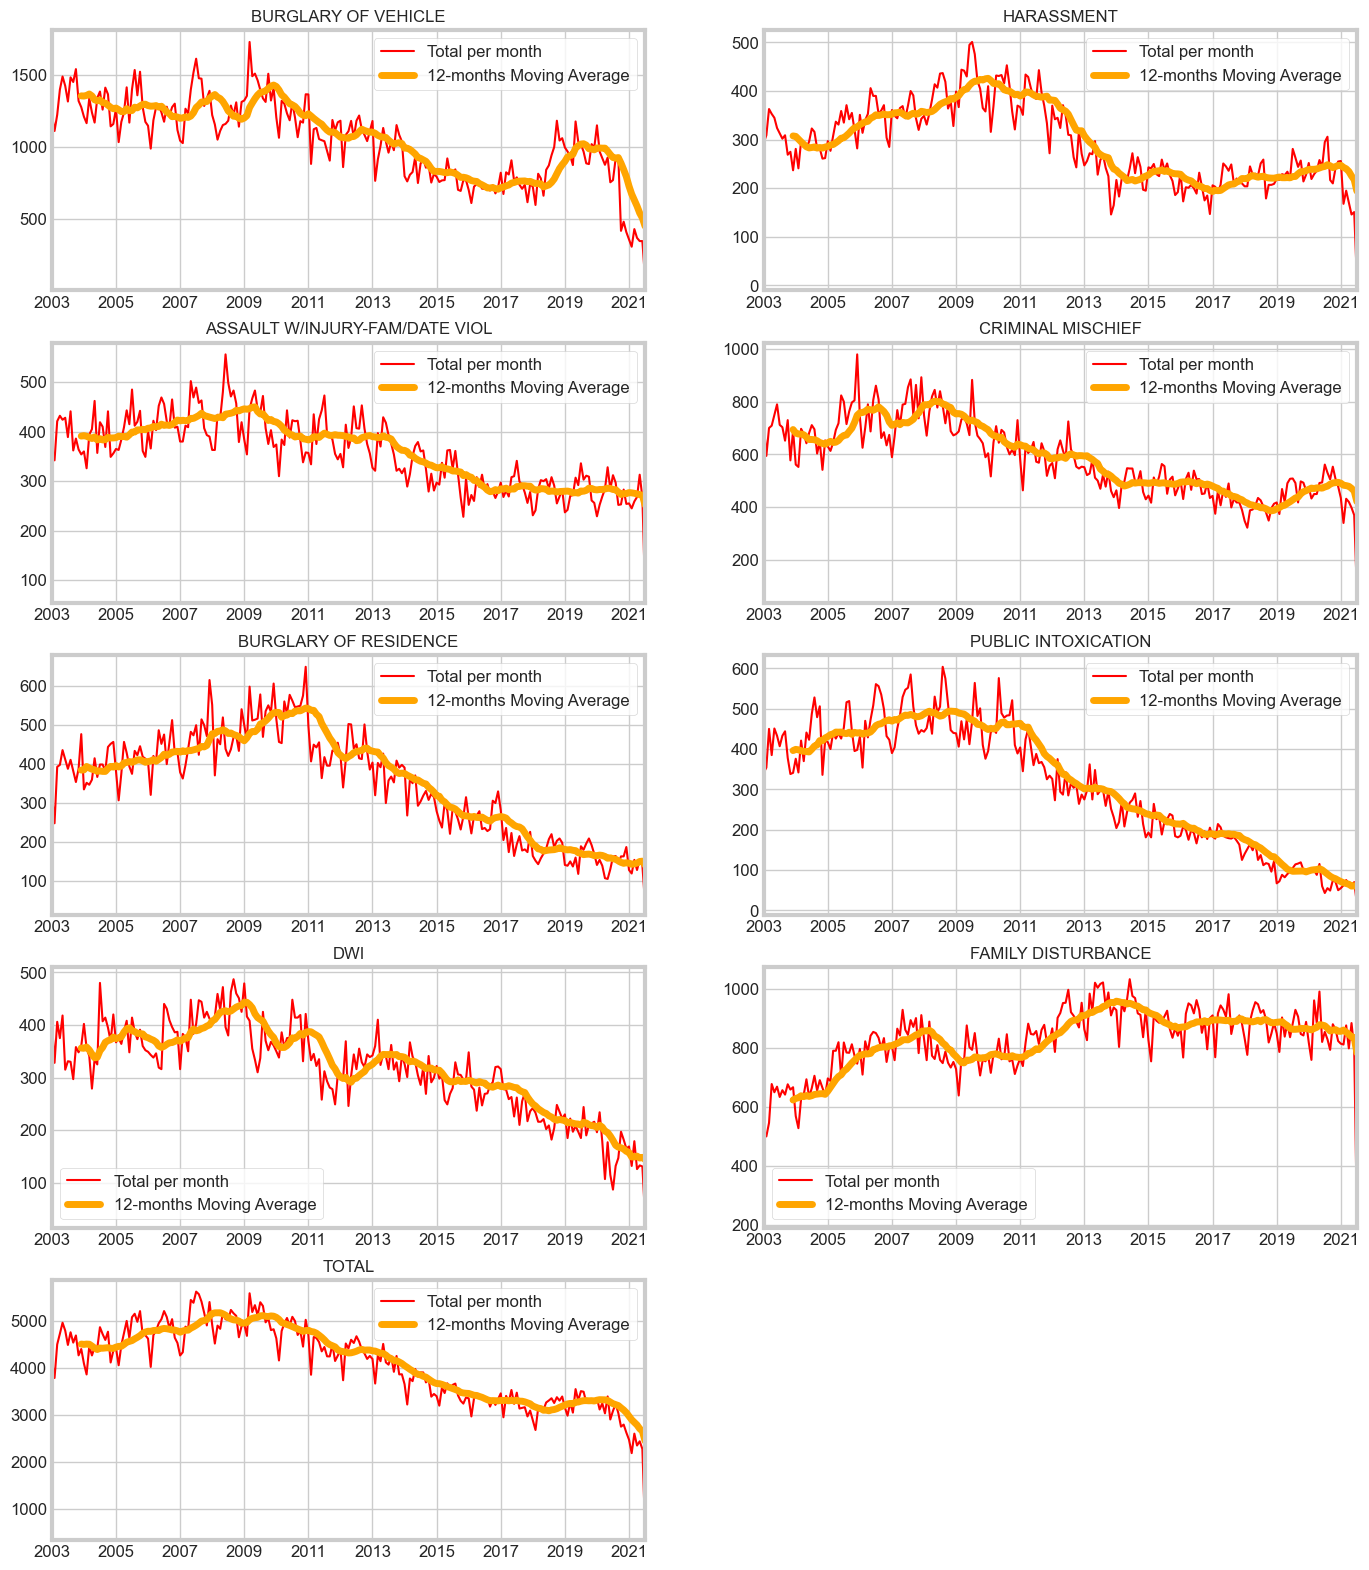

In [11]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20), dpi=100)

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

highest_offense_description
PUBLIC INTOXICATION                                   17231
THEFT                                                 15999
BURGLARY OF VEHICLE                                    9381
WARRANT ARREST NON TRAFFIC                             8970
DWI                                                    8363
ASSAULT WITH INJURY                                    7691
VIOL CITY ORDINANCE - OTHER                            6193
POSS OF DRUG PARAPHERNALIA                             6110
CRIMINAL MISCHIEF                                      5958
CRIMINAL TRESPASS                                      3984
POSSESSION OF MARIJUANA                                3415
DISTURBANCE - OTHER                                    3415
CUSTODY ARREST TRAFFIC WARR                            2993
POSS CONTROLLED SUB/NARCOTIC                           2935
CAMPING IN PARK                                        2785
VOCO - ALCOHOL  CONSUMPTION                            2690
ASSAULT BY CONTACT                                     2659
CRIMINAL TRESPASS/TRANSIENT                            2597
THEFT OF BICYCLE                                       2561
URINATING IN PUBLIC PLACE                              2339
FAMILY DISTURBANCE                                     2232
DOC FIGHTING                                           2152
PROTECTIVE ORDER                                       2099
ASSAULT W/INJURY-FAM/DATE VIOL                         1752

highest_offense_description
PUBLIC INTOXICATION                                0.100773
THEFT                                              0.093567
BURGLARY OF VEHICLE                                0.054863
WARRANT ARREST NON TRAFFIC                         0.052460
DWI                                                0.048910
ASSAULT WITH INJURY                                0.044980
VIOL CITY ORDINANCE - OTHER                        0.036219
POSS OF DRUG PARAPHERNALIA                         0.035733
CRIMINAL MISCHIEF                                  0.034844
CRIMINAL TRESPASS                                  0.023300
POSSESSION OF MARIJUANA                            0.019972
DISTURBANCE - OTHER                                0.019972
CUSTODY ARREST TRAFFIC WARR                        0.017504
POSS CONTROLLED SUB/NARCOTIC                       0.017165
CAMPING IN PARK                                    0.016288
VOCO - ALCOHOL  CONSUMPTION                        0.015732
ASSAULT BY CONTACT                                 0.015551
CRIMINAL TRESPASS/TRANSIENT                        0.015188
THEFT OF BICYCLE                                   0.014978
URINATING IN PUBLIC PLACE                          0.013679
FAMILY DISTURBANCE                                 0.013053
DOC FIGHTING                                       0.012586
PROTECTIVE ORDER                                   0.012276
ASSAULT W/INJURY-FAM/DATE VIOL                     0.010246

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

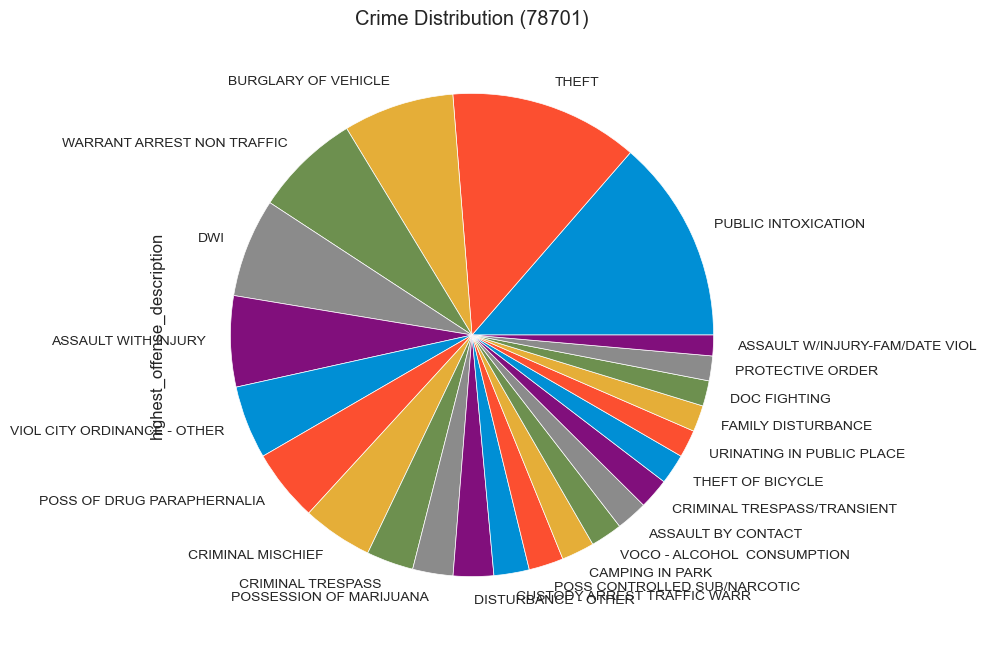

In [12]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(
    df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

highest_offense_description
THEFT                                                 17330
BURGLARY OF VEHICLE                                   16060
FAMILY DISTURBANCE                                    15034
CRIMINAL MISCHIEF                                      9621
THEFT BY SHOPLIFTING                                   7725
ASSAULT W/INJURY-FAM/DATE VIOL                         7303
BURGLARY OF RESIDENCE                                  6126
DWI                                                    5109
DISTURBANCE - OTHER                                    4868
AUTO THEFT                                             4373
CUSTODY ARREST TRAFFIC WARR                            4364
HARASSMENT                                             4329
POSS OF DRUG PARAPHERNALIA                             3746
ASSAULT WITH INJURY                                    3406
PUBLIC INTOXICATION                                    3390
CRIMINAL TRESPASS                                      3194
POSS CONTROLLED SUB/NARCOTIC                           3027
RUNAWAY CHILD                                          2972
WARRANT ARREST NON TRAFFIC                             2802
POSSESSION OF MARIJUANA                                2726
BURGLARY NON RESIDENCE                                 2533
VIOL CITY ORDINANCE - OTHER                            1874

----------------------------------


highest_offense_description
THEFT                                              0.094954
BURGLARY OF VEHICLE                                0.087996
FAMILY DISTURBANCE                                 0.082374
CRIMINAL MISCHIEF                                  0.052715
THEFT BY SHOPLIFTING                               0.042327
ASSAULT W/INJURY-FAM/DATE VIOL                     0.040014
BURGLARY OF RESIDENCE                              0.033565
DWI                                                0.027993
DISTURBANCE - OTHER                                0.026673
AUTO THEFT                                         0.023960
CUSTODY ARREST TRAFFIC WARR                        0.023911
HARASSMENT                                         0.023719
POSS OF DRUG PARAPHERNALIA                         0.020525
ASSAULT WITH INJURY                                0.018662
PUBLIC INTOXICATION                                0.018574
CRIMINAL TRESPASS                                  0.017501
POSS CONTROLLED SUB/NARCOTIC                       0.016585
RUNAWAY CHILD                                      0.016284
WARRANT ARREST NON TRAFFIC                         0.015353
POSSESSION OF MARIJUANA                            0.014936
BURGLARY NON RESIDENCE                             0.013879
VIOL CITY ORDINANCE - OTHER                        0.010268

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

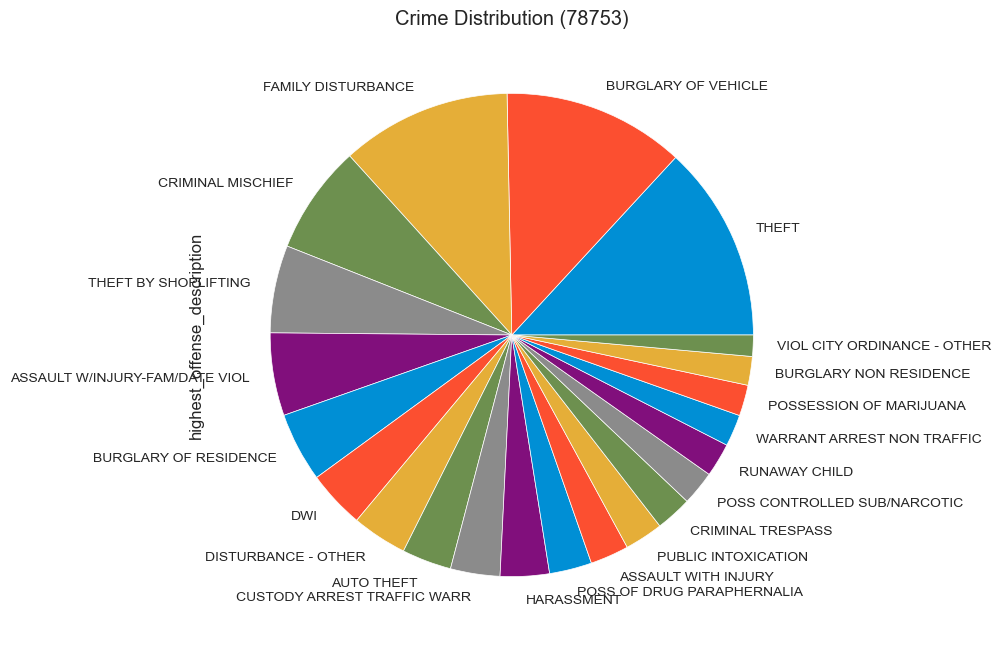

In [13]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_53_off.to_frame())
print("----------------------------------")
display(
    df_53.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)

plt.figure(dpi=100)
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

highest_offense_description
FAMILY DISTURBANCE                                    20779
BURGLARY OF VEHICLE                                   19977
THEFT                                                 15794
CRIMINAL MISCHIEF                                     11190
ASSAULT W/INJURY-FAM/DATE VIOL                         9756
BURGLARY OF RESIDENCE                                  8978
PUBLIC INTOXICATION                                    6404
CUSTODY ARREST TRAFFIC WARR                            6011
DWI                                                    5720
HARASSMENT                                             5603
DISTURBANCE - OTHER                                    5253
AUTO THEFT                                             4771
ASSAULT WITH INJURY                                    4610
CRIMINAL TRESPASS                                      4006
POSS CONTROLLED SUB/NARCOTIC                           3921
POSSESSION OF MARIJUANA                                3808
THEFT BY SHOPLIFTING                                   3608
POSS OF DRUG PARAPHERNALIA                             3559
WARRANT ARREST NON TRAFFIC                             3448
RUNAWAY CHILD                                          2816
VIOL CITY ORDINANCE - OTHER                            2197

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.098845
BURGLARY OF VEHICLE                                0.095030
THEFT                                              0.075132
CRIMINAL MISCHIEF                                  0.053231
ASSAULT W/INJURY-FAM/DATE VIOL                     0.046409
BURGLARY OF RESIDENCE                              0.042708
PUBLIC INTOXICATION                                0.030464
CUSTODY ARREST TRAFFIC WARR                        0.028594
DWI                                                0.027210
HARASSMENT                                         0.026653
DISTURBANCE - OTHER                                0.024988
AUTO THEFT                                         0.022696
ASSAULT WITH INJURY                                0.021930
CRIMINAL TRESPASS                                  0.019056
POSS CONTROLLED SUB/NARCOTIC                       0.018652
POSSESSION OF MARIJUANA                            0.018115
THEFT BY SHOPLIFTING                               0.017163
POSS OF DRUG PARAPHERNALIA                         0.016930
WARRANT ARREST NON TRAFFIC                         0.016402
RUNAWAY CHILD                                      0.013396
VIOL CITY ORDINANCE - OTHER                        0.010451

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

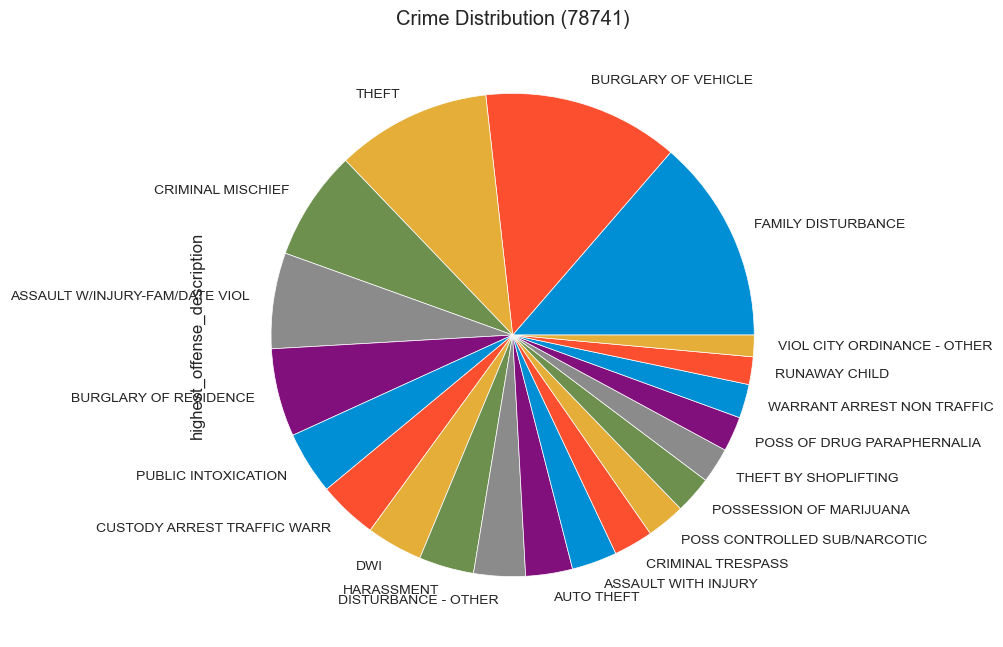

In [14]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
display(df_41_off.to_frame())
print("----------------------------------")
display(
    df_41.highest_offense_description.value_counts(normalize=True).head(21).to_frame()
)
plt.figure(dpi=100)
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

highest_offense_description
FAMILY DISTURBANCE                                    15291
BURGLARY OF VEHICLE                                   14813
THEFT                                                 13709
CRIMINAL MISCHIEF                                      8658
BURGLARY OF RESIDENCE                                  5898
ASSAULT W/INJURY-FAM/DATE VIOL                         5842
HARASSMENT                                             5190
DISTURBANCE - OTHER                                    4595
DWI                                                    4465
PUBLIC INTOXICATION                                    4019
CUSTODY ARREST TRAFFIC WARR                            3248
AUTO THEFT                                             2947
BURGLARY NON RESIDENCE                                 2907
ASSAULT WITH INJURY                                    2749
RUNAWAY CHILD                                          2627
POSSESSION OF MARIJUANA                                2600
WARRANT ARREST NON TRAFFIC                             2113
POSS CONTROLLED SUB/NARCOTIC                           2065
THEFT BY SHOPLIFTING                                   2030
CRIMINAL TRESPASS                                      1997
IDENTITY THEFT                                         1685
POSS OF DRUG PARAPHERNALIA                             1531

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.099553
BURGLARY OF VEHICLE                                0.096441
THEFT                                              0.089254
CRIMINAL MISCHIEF                                  0.056369
BURGLARY OF RESIDENCE                              0.038399
ASSAULT W/INJURY-FAM/DATE VIOL                     0.038035
HARASSMENT                                         0.033790
DISTURBANCE - OTHER                                0.029916
DWI                                                0.029070
PUBLIC INTOXICATION                                0.026166
CUSTODY ARREST TRAFFIC WARR                        0.021146
AUTO THEFT                                         0.019187
BURGLARY NON RESIDENCE                             0.018926
ASSAULT WITH INJURY                                0.017898
RUNAWAY CHILD                                      0.017103
POSSESSION OF MARIJUANA                            0.016928
WARRANT ARREST NON TRAFFIC                         0.013757
POSS CONTROLLED SUB/NARCOTIC                       0.013444
THEFT BY SHOPLIFTING                               0.013216
CRIMINAL TRESPASS                                  0.013002
IDENTITY THEFT                                     0.010970
POSS OF DRUG PARAPHERNALIA                         0.009968

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

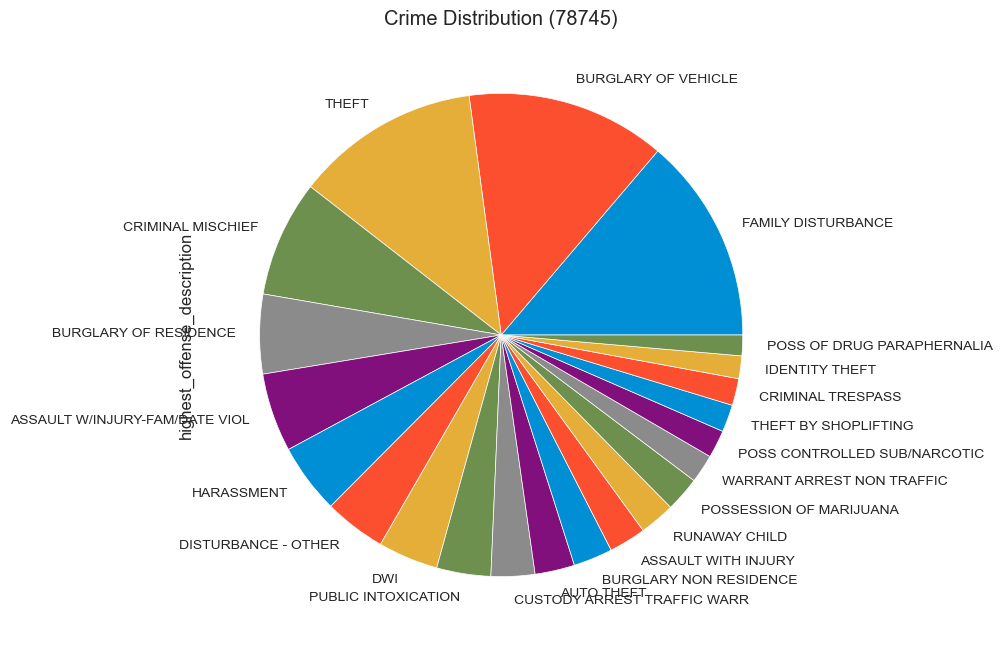

In [15]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
display(df_45_off.to_frame())
print("----------------------------------")
display(
    df_45.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

highest_offense_description
BURGLARY OF VEHICLE                                    8721
THEFT                                                  5677
CRIMINAL MISCHIEF                                      5024
THEFT OF BICYCLE                                       3552
PUBLIC INTOXICATION                                    2642
BURGLARY OF RESIDENCE                                  2142
WARRANT ARREST NON TRAFFIC                             1565
AUTO THEFT                                             1391
CRIMINAL TRESPASS                                      1377
ASSAULT WITH INJURY                                    1279
HARASSMENT                                             1242
FAMILY DISTURBANCE                                     1238
DWI                                                    1235
DISTURBANCE - OTHER                                    1133
BURGLARY NON RESIDENCE                                  895
CRIMINAL TRESPASS/TRANSIENT                             871
VIOL CITY ORDINANCE - OTHER                             798
GRAFFITI                                                788
CUSTODY ARREST TRAFFIC WARR                             786
ASSAULT W/INJURY-FAM/DATE VIOL                          713
POSSESSION OF MARIJUANA                                 668
ASSAULT BY CONTACT                                      634

'----------------------------------'

highest_offense_description
BURGLARY OF VEHICLE                                0.149606
THEFT                                              0.097387
CRIMINAL MISCHIEF                                  0.086185
THEFT OF BICYCLE                                   0.060934
PUBLIC INTOXICATION                                0.045323
BURGLARY OF RESIDENCE                              0.036745
WARRANT ARREST NON TRAFFIC                         0.026847
AUTO THEFT                                         0.023862
CRIMINAL TRESPASS                                  0.023622
ASSAULT WITH INJURY                                0.021941
HARASSMENT                                         0.021306
FAMILY DISTURBANCE                                 0.021238
DWI                                                0.021186
DISTURBANCE - OTHER                                0.019436
BURGLARY NON RESIDENCE                             0.015353
CRIMINAL TRESPASS/TRANSIENT                        0.014942
VIOL CITY ORDINANCE - OTHER                        0.013689
GRAFFITI                                           0.013518
CUSTODY ARREST TRAFFIC WARR                        0.013484
ASSAULT W/INJURY-FAM/DATE VIOL                     0.012231
POSSESSION OF MARIJUANA                            0.011459
ASSAULT BY CONTACT                                 0.010876

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

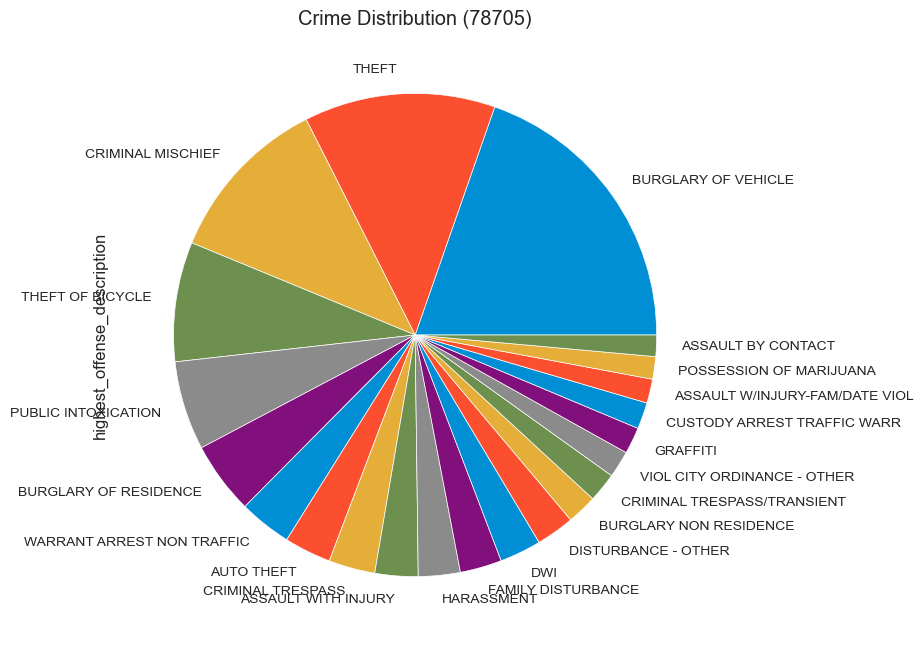

In [16]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off.to_frame())
display("----------------------------------")
display(
    df_05.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

highest_offense_description
BURGLARY OF VEHICLE                                    5450
THEFT                                                  5119
THEFT BY SHOPLIFTING                                   2564
CRIMINAL MISCHIEF                                      1285
DWI                                                     893
FAMILY DISTURBANCE                                      779
VIOL CITY ORDINANCE - OTHER                             652
HARASSMENT                                              638
AUTO THEFT                                              617
BURGLARY OF RESIDENCE                                   524
THEFT FROM PERSON                                       462
IDENTITY THEFT                                          456
DISTURBANCE - OTHER                                     441
BURGLARY NON RESIDENCE                                  359
ASSAULT W/INJURY-FAM/DATE VIOL                          343
CRED CARD ABUSE - OTHER                                 331
PUBLIC INTOXICATION                                     323
POSSESSION OF MARIJUANA                                 297
FRAUD - OTHER                                           284
SUSPICIOUS PERSON                                       259
CUSTODY ARREST TRAFFIC WARR                             247
WARRANT ARREST NON TRAFFIC                              223
ASSAULT WITH INJURY                                     201
VIOL WATER SAFETY ACT                                   195

highest_offense_description
BURGLARY OF VEHICLE                                0.190546
THEFT                                              0.178973
THEFT BY SHOPLIFTING                               0.089644
CRIMINAL MISCHIEF                                  0.044927
DWI                                                0.031222
FAMILY DISTURBANCE                                 0.027236
VIOL CITY ORDINANCE - OTHER                        0.022796
HARASSMENT                                         0.022306
AUTO THEFT                                         0.021572
BURGLARY OF RESIDENCE                              0.018320
THEFT FROM PERSON                                  0.016153
IDENTITY THEFT                                     0.015943
DISTURBANCE - OTHER                                0.015419
BURGLARY NON RESIDENCE                             0.012552
ASSAULT W/INJURY-FAM/DATE VIOL                     0.011992
CRED CARD ABUSE - OTHER                            0.011573
PUBLIC INTOXICATION                                0.011293
POSSESSION OF MARIJUANA                            0.010384
FRAUD - OTHER                                      0.009929
SUSPICIOUS PERSON                                  0.009055
CUSTODY ARREST TRAFFIC WARR                        0.008636
WARRANT ARREST NON TRAFFIC                         0.007797
ASSAULT WITH INJURY                                0.007027
VIOL WATER SAFETY ACT                              0.006818

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

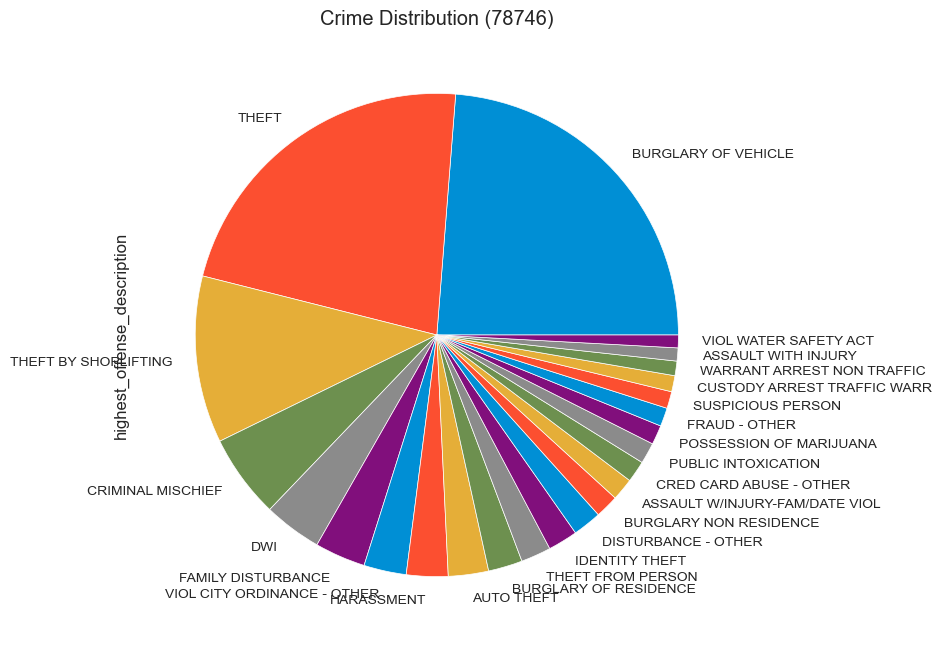

In [17]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off.to_frame())
display(
    df_46.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes istributed? 

In [18]:
# Creating separate dataframes for violent crime & murder rates
df_viol = df.query(
    'category_description == ["Aggravated Assault", "Robbery", "Rape", "Murder"]'
)
df_mur = df[df.category_description == "Murder"]
df_agg_asslt = df[df.category_description == "Aggravated Assault"]
df_robbery = df[df.category_description == "Robbery"]
df_rape = df[df.category_description == "Rape"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_mur_17 = df_mur[df_mur.year == 2017]
df_mur_18 = df_mur[df_mur.year == 2018]
df_mur_19 = df_mur[df_mur.year == 2019]
df_mur_20 = df_mur[df_mur.year == 2020]
df_mur_21 = df_mur[df_mur.year == 2021]

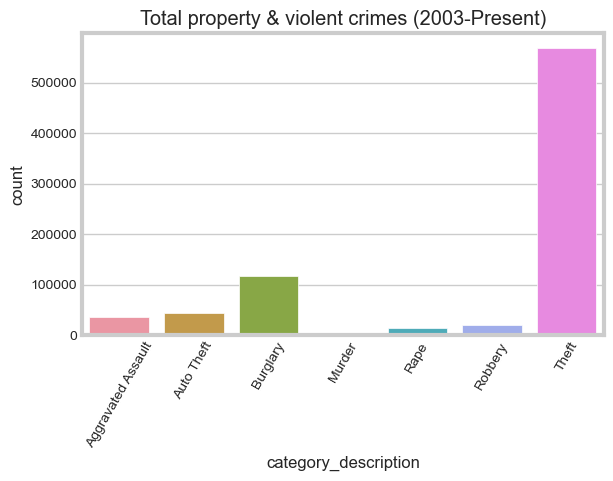

Theft                 569852
Burglary              117231
Auto Theft             45088
Aggravated Assault     35750
Robbery                20456
Rape                   13568
Murder                   557
Name: category_description, dtype: int64

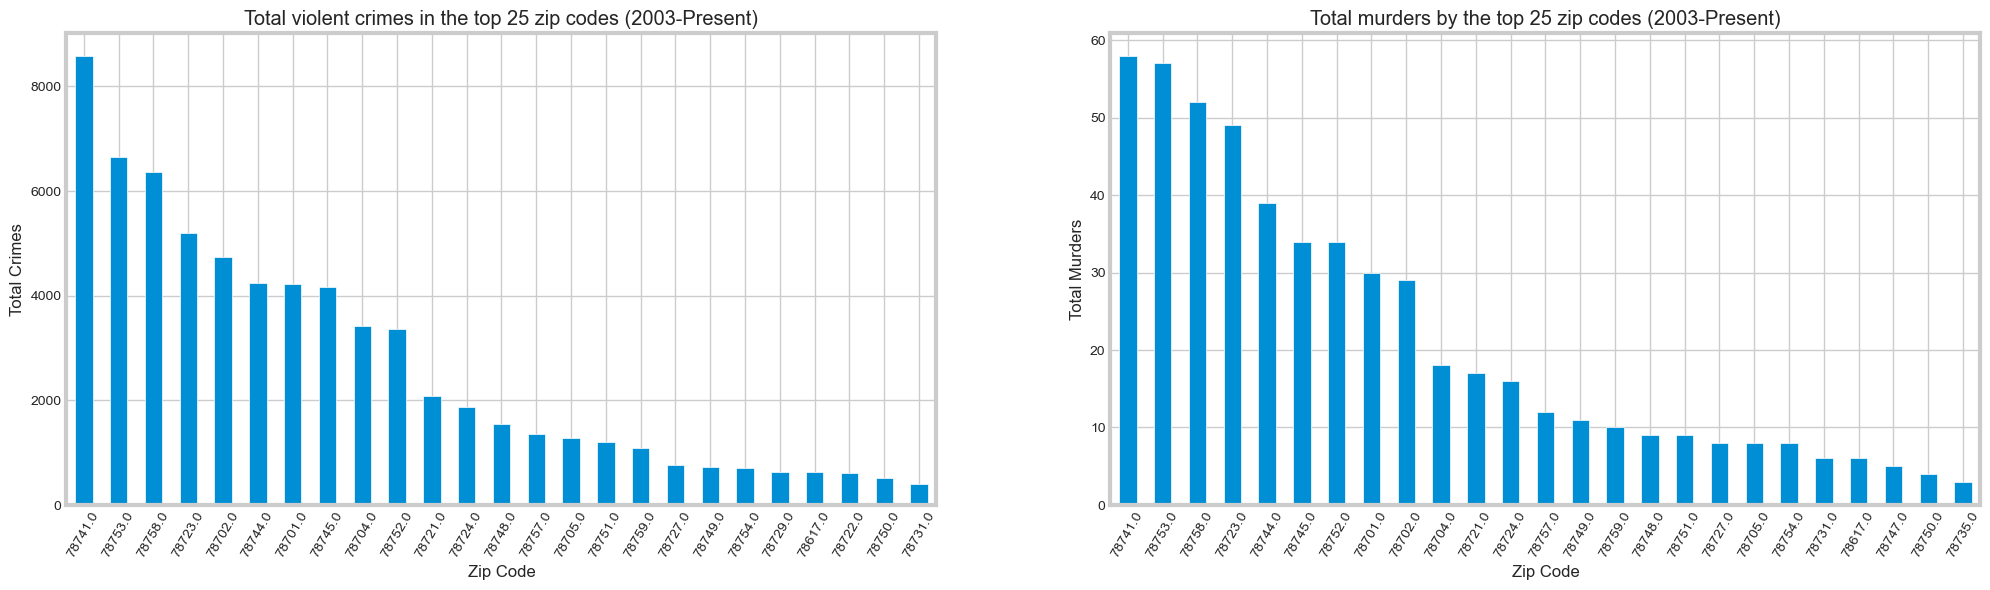

category_description  Aggravated Assault  Murder  Rape  Robbery
zip_code                                                       
0.0                                    1       0     0        0
78610.0                                2       0     3        0
78613.0                               45       1    29       58
78617.0                              355       6   157      106
78621.0                                2       0     0        0
78634.0                                1       0     0        0
78640.0                                0       0     3        0
78641.0                                1       0     0        0
78645.0                                0       0     1        0
78652.0                                8       0     1        1
78653.0                               36       1     7        5
78660.0                              159       3    43       57
78664.0                                7       0     8        0
78669.0                                0       0     1        0
78681.0                                3       0     3        0
78701.0                             2061      30   772     1353
78702.0                             2439      29   617     1660
78703.0                              166       2    85      113
78704.0                             1639      18   779      990
78705.0                              499       8   450      313
78712.0                                1       0     3        0
78717.0                              153       1    46       39
78719.0                               26       0     3       10
78721.0                             1308      17   311      446
78722.0                              269       3    98      241
78723.0                             2596      49   806     1747
78724.0                             1152      16   355      341
78725.0                               77       1    45       13
78726.0                              174       2    93       32
78727.0                              418       8   177      152
78728.0                               21       1    12        3
78729.0                              337       2   151      137
78730.0                               36       0    17        4
78731.0                              191       6   119       89
78732.0                                1       0     2        1
78733.0                                2       0     5        1
78735.0                              224       3    77       47
78736.0                               59       0    31       13
78737.0                                8       0     5        1
78738.0                                1       0     0        0
78739.0                               37       0    40        4
78741.0                             4158      58  1371     3001
78742.0                               83       2    21       24
78744.0                             2362      39   894      939
78745.0                             2241      34   862     1025
78746.0                              127       3    78      134
78747.0                              237       5    95       45
78748.0                              839       9   382      319
78749.0                              362      11   202      144
78750.0                              258       4   139      106
78751.0                              528       9   280      392
78752.0                             1639      34   491     1194
78753.0                             3364      57  1137     2097
78754.0                              388       8   158      143
78756.0                              156       2    98       96
78757.0                              684      12   236      418
78758.0                             3136      52  1093     2087
78759.0                              554      10   255      277

<Figure size 432x288 with 0 Axes>

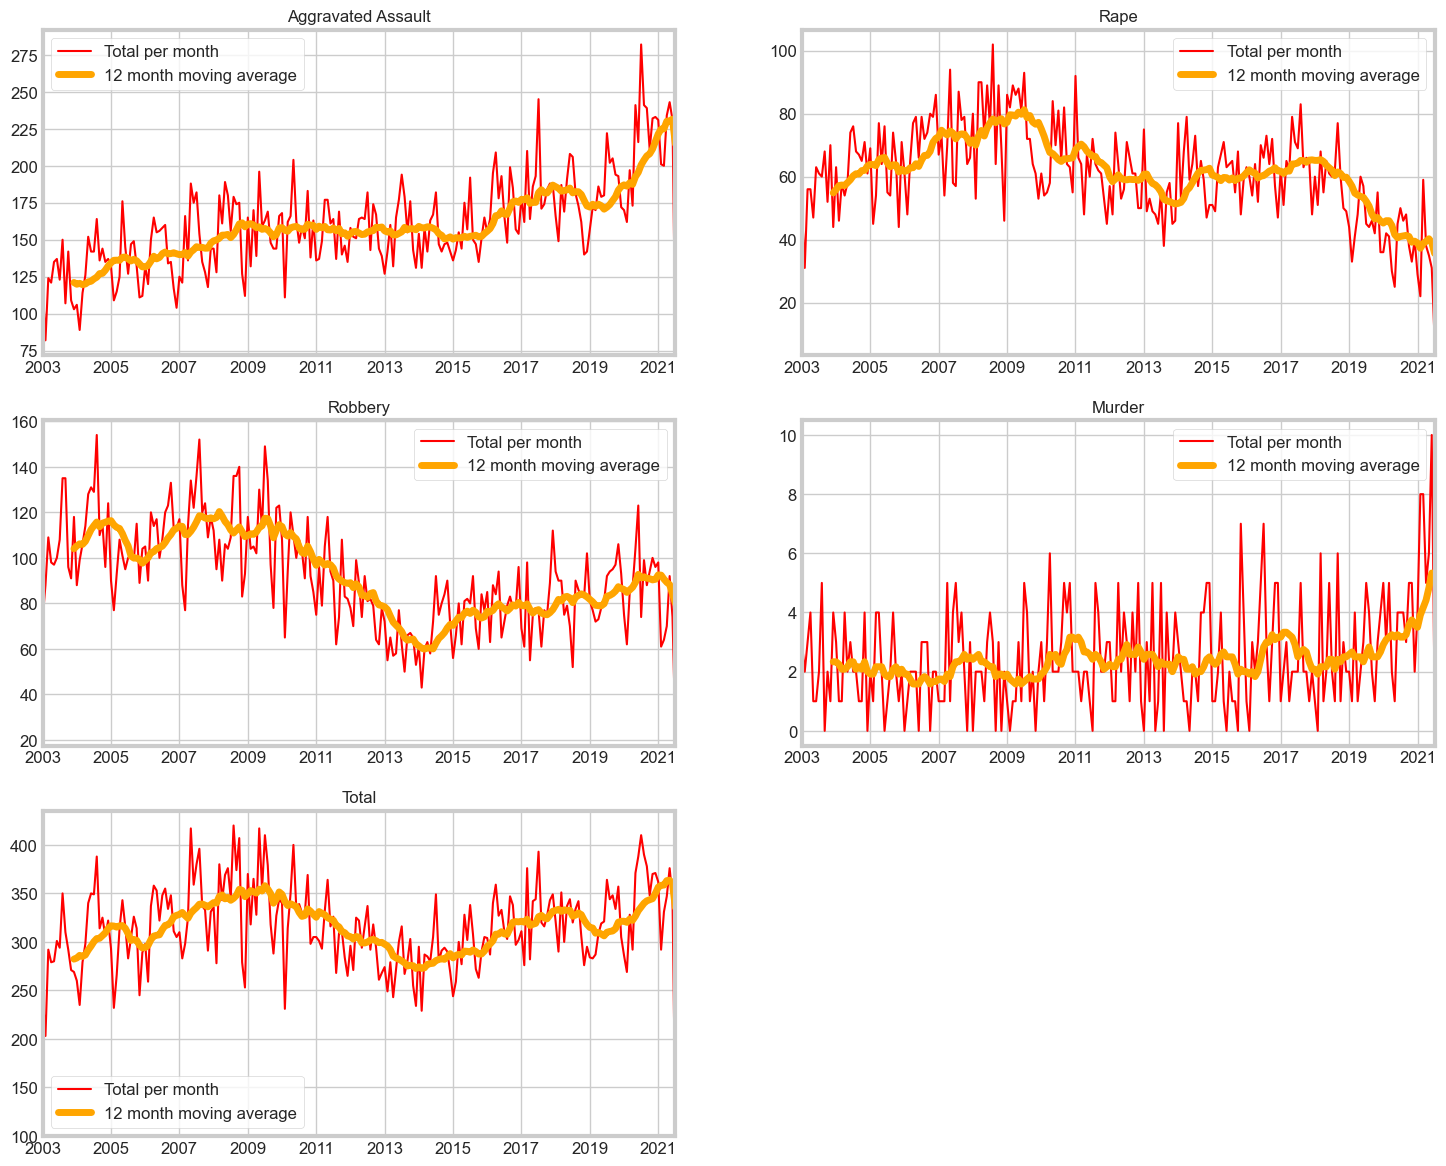

In [19]:
plt.figure(dpi=100)
plt.xlabel("Crime Type")
plt.ylabel("Total Incidents")
plt.xticks(rotation="60")
sb.countplot(df.category_description).set_title(
    "Total property & violent crimes (2003-Present)"
)
plt.show()

# display(df_viol.zip_code.value_counts(normalize=True).head(25))
display(df.category_description.value_counts())

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2, dpi=100)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Total violent crimes in the top 25 zip codes (2003-Present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
    ax=axs[0],
)
df_mur.zip_code.value_counts().head(25).plot.bar(
    title="Total murders by the top 25 zip codes (2003-Present)",
    xlabel="Zip Code",
    ylabel="Total Murders",
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.category_description)
mur_freq = pd.crosstab(df_mur.zip_code, df_mur.category_description)
display(viol_freq)

monthly_viol = pd.DataFrame(
    df_viol[df_viol["category_description"] == "Aggravated Assault"]
    .resample("M")
    .size()
)
monthly_viol.columns = ["Aggravated Assault"]

for i in df_viol["category_description"].unique():
    monthly_viol[i] = pd.DataFrame(
        df_viol[df_viol["category_description"] == i].resample("M").size()
    )

monthly_viol["Total"] = monthly_viol.sum(axis=1)

ViolCrimeTypes = monthly_viol.columns

plt.figure(1)
plt.figure(figsize=(16, 25), dpi=100)

i = 521
for eachCrime in ViolCrimeTypes:
    plt.subplot(i)
    monthly_viol[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly_viol[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

viol_freq.to_csv("viol_freq.csv")

Currently, 78741 shares 13.07% of violent crime, followed by 78753, sharing 9.92%.


### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

<Figure size 600x400 with 0 Axes>

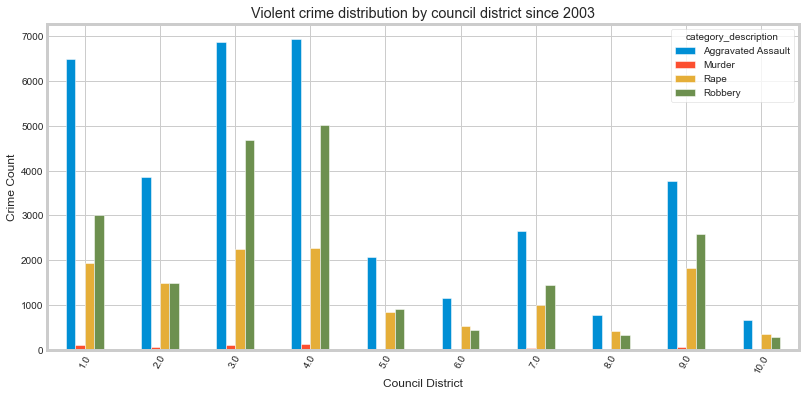

<Figure size 600x400 with 0 Axes>

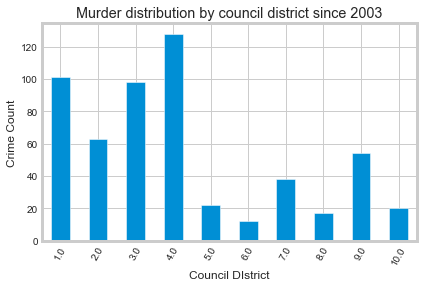

<Figure size 600x400 with 0 Axes>

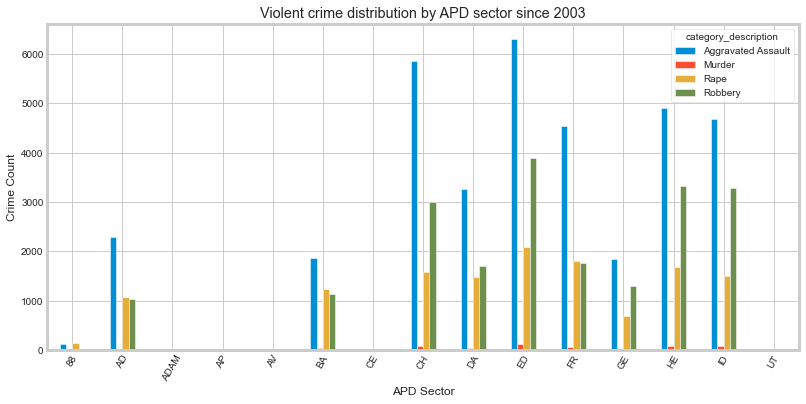

<Figure size 600x400 with 0 Axes>

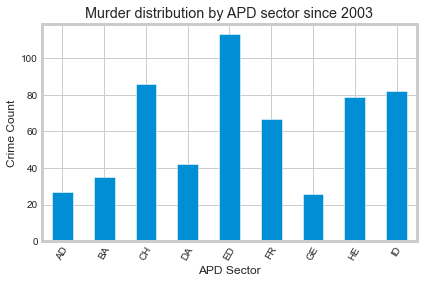

<Figure size 600x400 with 0 Axes>

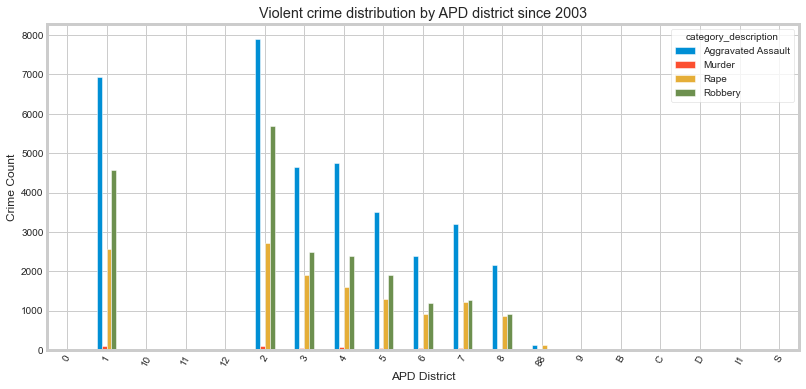

<Figure size 600x400 with 0 Axes>

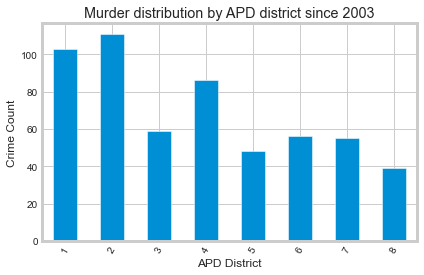

In [20]:
plt.figure(dpi=100)
pd.crosstab(df_viol.council_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    rot=60,
    xlabel="Council District",
    ylabel="Crime Count",
    title="Violent crime distribution by council district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.council_district, df_mur.category_description).plot.bar(
    rot=60,
    xlabel="Council DIstrict",
    ylabel="Crime Count",
    title="Murder distribution by council district since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_sector, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD sector since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_sector, df_mur.category_description).plot.bar(
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD sector since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_district, df_mur.category_description).plot.bar(
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD district since 2003",
    legend=False,
)
plt.show()

### K. Violent crime and murder distribution by location type

category_description                            Aggravated Assault  Murder  \
location_type                                                                
ABANDONED/CONDEMNED STRUCTURE                                   21       1   
AMUSEMENT PARK                                                   1       0   
ARENA / STADIUM / FAIRGROUNDS / COLISEUM                         2       0   
ATM SEPARATE FROM BANK                                           2       0   
AUTO DEALERSHIP NEW / USED                                      13       0   
BANKS / SAVINGS & LOAN                                          17       1   
BAR / NIGHT CLUB                                               758      12   
CAMP / CAMPGROUND                                               43       0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                            34       1   
COMMERCIAL / OFFICE BUILDING                                   408       9   
COMMUNITY CENTER                                                10       0   
CONSTRUCTION SITE                                               38       0   
CONVENIENCE STORE                                              288       4   
DAYCARE FACILITY                                                 0       0   
DEPARTMENT / DISCOUNT STORE                                     62       0   
DRUG STORE / DR. OFFICE / HOSPITAL                             122       6   
FIELD / WOODS                                                  291      19   
GAMBLING FACILITY / CASINO / RACE TRACK                         10       1   
GAS / SERVICE STATIONS                                         271       6   
GOVERNMENT / PUBLIC BUILDING                                   113       2   
GROCERY / SUPERMARKET                                           72       2   
HOTEL / MOTEL / ETC.                                           775      15   
INDUSTRIAL SITE                                                  5       0   
JAIL / PRISON                                                    6       0   
LAKE / WATERWAY                                                 10       1   
LIQUOR STORE                                                     9       1   
OTHER / UNKNOWN                                                470      13   
PARK / PLAYGROUND                                              187       1   
PARKING LOTS / GARAGE                                         4915     104   
RENTAL STORAGE FACILITY                                         20       1   
RESIDENCE / HOME                                             17824     238   
REST AREA                                                        2       0   
RESTAURANTS                                                    258       3   
SCHOOL - COLLEGE / UNIVERSITY                                    5       0   
SCHOOL - ELEMENTARY / SECONDARY                                 11       0   
SCHOOLS / COLLEGES                                              43       2   
SHELTER-MISSION / HOMELESS                                      23       0   
SHOPPING MALL                                                    9       0   
SPECIALTY  STORE (TV  FUR ETC.)                                 52       0   
STREETS / HWY / ROAD / ALLEY                                  8387     111   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                 110       1   
TRIBAL LANDS                                                     0       0   

category_description                            Rape  Robbery  
location_type                                                  
ABANDONED/CONDEMNED STRUCTURE                     14       12  
AMUSEMENT PARK                                     1        4  
ARENA / STADIUM / FAIRGROUNDS / COLISEUM           0        0  
ATM SEPARATE FROM BANK                             0        9  
AUTO DEALERSHIP NEW / USED                         2        2  
BANKS / SAVINGS & LOAN                            10      396  
BAR / NIGHT CLUB                                 160   

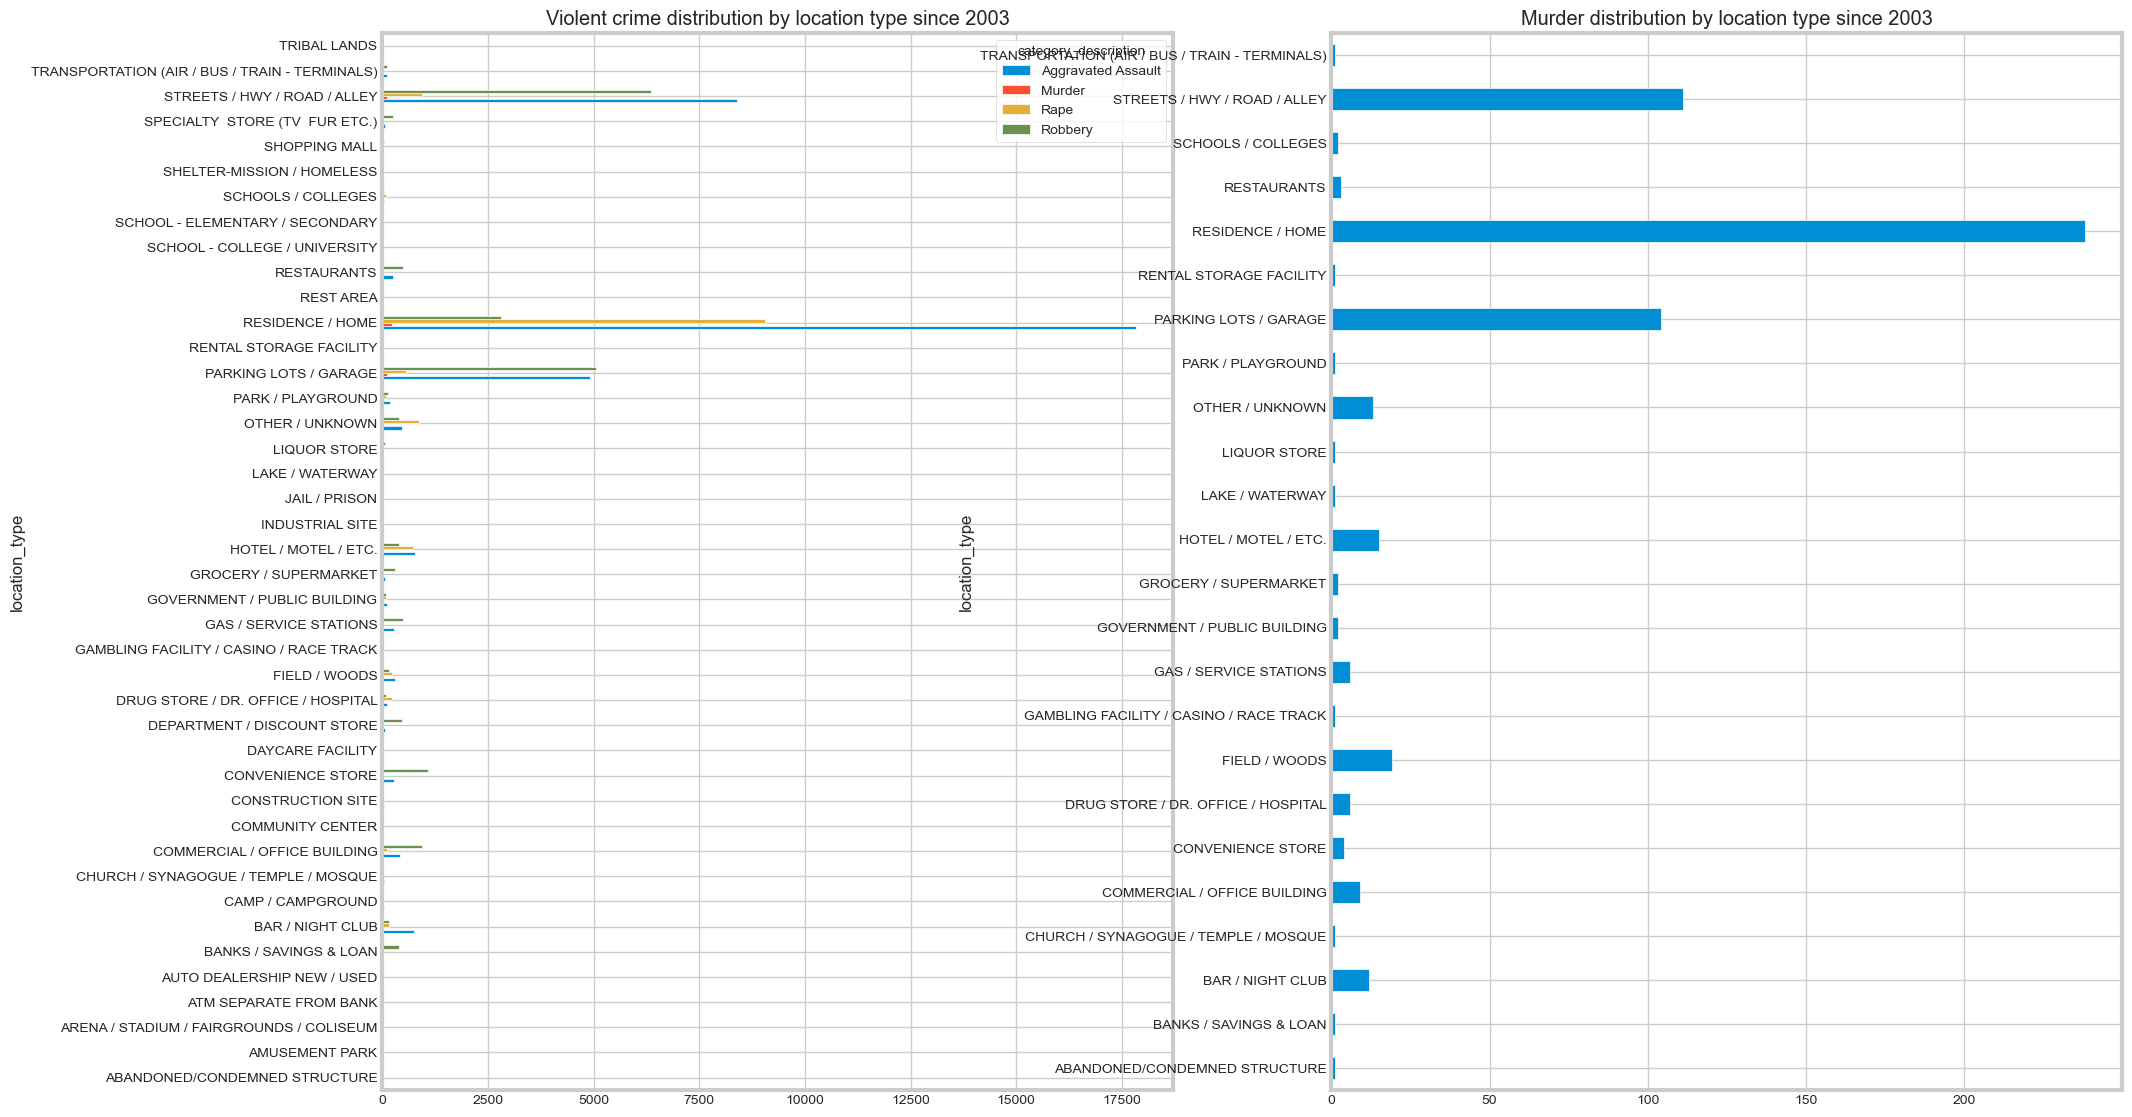

In [21]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.category_description)
display(viol_loc)

mur_loc = pd.crosstab(df_mur.location_type, df_mur.category_description)

fig, axs = plt.subplots(figsize=(20, 14), dpi=100, ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003", ax=axs[0],
)
mur_loc.plot.barh(
    title="Murder distribution by location type since 2003", legend=False, ax=axs[1]
)
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [22]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Robbery 

In [23]:
agg_robbery_coords_heat = df_robbery[
    (df_robbery["latitude"].isnull() == False)
    & (df_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [24]:
mur_coords_heat = df_mur[
    (df_mur["latitude"].isnull() == False) & (df_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [25]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(50).to_frame()

address
00 BLOCK UNKNOWN                    163
900 BLOCK E 32ND ST                 146
1137 GUNTER ST                      143
1030 NORWOOD PARK BLVD              135
500 E 7TH ST                        131
6409 SPRINGDALE RD                  131
1700 BURTON DR                      126
1071 CLAYTON LN                     116
9024 NORTHGATE BLVD                 111
6103 MANOR RD                       110
9200 NORTH PLZ                      107
1124 RUTLAND DR                     103
1054 SPRINGDALE RD                  103
2901 S CAPITAL OF TEXAS HWY NB       97
9601 MIDDLE FISKVILLE RD             96
5800 TECHNI CENTER DR                94
9515 N LAMAR BLVD                    93
1000 E 41ST ST                       92
12151 N IH 35 SVRD NB                91
1500 FARO DR                         91
6118 FAIRWAY ST                      90
10000 N LAMAR BLVD                   90
700 BLOCK E 8TH ST                   88
7020 GRAND CANYON DR                 88
8800 N IH 35 SVRD SB                 87
1515 WICKERSHAM LN                   85
2401 S LAKESHORE BLVD                84
9300 NORTHGATE BLVD                  84
2237 E RIVERSIDE DR                  84
2500 BLOCK S CONGRESS AVE            83
9010 GALEWOOD DR                     81
1300 CROSSING PL                     79
7000 DECKER LN                       79
2201 WILLOW CREEK DR                 79
6855 E US 290 HWY SVRD EB            79
8312 N IH 35 SVRD SB                 79
3909 N IH 35 SVRD NB                 77
9001 NORTHGATE BLVD                  75
1845 BURTON DR                       75
2400 WICKERSHAM LN                   74
1601 ROYAL CREST DR                  73
4404 E OLTORF ST                     72
8926 N LAMAR BLVD                    72
2101 BURTON DR                       71
4900 BLOCK MUELLER BLVD              70
2005 WILLOW CREEK DR                 69
1600 WICKERSHAM LN                   69
3603 SOUTHRIDGE DR                   68
2200 S PLEASANT VALLEY RD            68
4700 E RIVERSIDE DR                  67

In [26]:
# Show addresses with 2 or more reported murders
df_mur.address.value_counts().head(35).to_frame()

address
4700 E RIVERSIDE DR              3
601 E 15TH ST                    3
8610 N LAMAR BLVD                3
8800 N IH 35 SVRD SB             3
6407 SPRINGDALE RD               3
6409 SPRINGDALE RD               3
2400 WICKERSHAM LN               2
605 MASTERSON PASS               2
11105 N IH 35 SVRD NB            2
744 W WILLIAM CANNON DR          2
2713 S CONGRESS AVE              2
1200 BLOCK E 38TH HALF ST        2
9200 NORTH PLZ                   2
7330 BLUFF SPRINGS RD            2
8225 SAM RAYBURN DR              2
9036 N LAMAR BLVD                2
6600 ED BLUESTEIN BLVD SB        2
9220 N IH 35 SVRD SB             2
1137 GUNTER ST                   2
8912 N LAMAR BLVD                2
7100 N IH 35 SVRD SB             2
1050 SPRINGDALE RD               2
2508 E RIVERSIDE DR              2
10503 N LAMAR BLVD               2
6118 FAIRWAY ST                  2
200 BLOCK E 6TH ST               2
201 W 5TH ST                     2
9601 MIDDLE FISKVILLE RD         2
2501 ANKEN DR                    2
4900 E OLTORF ST                 2
10610 MORADO CIR                 2
9010 GALEWOOD DR                 2
833 FAIRFIELD DR                 2
2915 S IH 35 SVRD NB             2
7000 DECKER LN                   2

In [27]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_mur_17.to_csv("df_mur_17.csv")
df_mur_18.to_csv("df_mur_18.csv")
df_mur_19.to_csv("df_mur_19.csv")
df_mur_20.to_csv("df_mur_20.csv")
df_mur_21.to_csv("df_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_mur.to_csv("df_mur.csv")
df_agg_asslt.to_csv("df_agg_asslt.csv")
df_rape.to_csv("df_rape.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")